# GMMs:- Gaussian Mixture Models

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [3]:
df = make_blobs

## Firstly we explain weakness of KMeans

In [7]:
X,y_true = make_blobs(n_samples=400,random_state=0,centers=4,cluster_std=0.60)
X = X[:,::-1]

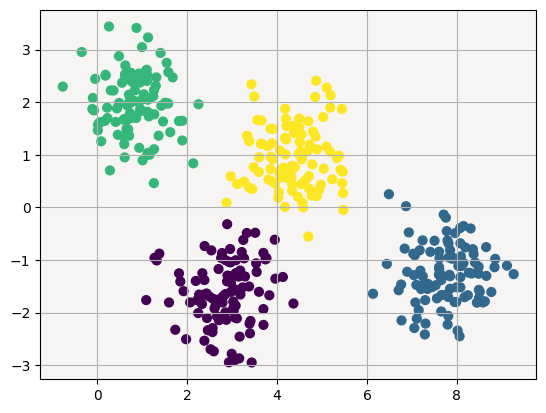

In [40]:
kmeans = KMeans(n_clusters=4,random_state=42)
lables = kmeans.fit(X).predict(X)
plt.scatter(X[:,0],X[:,1],c = lables,s = 40,cmap='viridis');
plt.grid(True)
plt.gca().set_facecolor('#f6f5f3')
plt.show()

In [50]:
def plot_KMeans(kmeans,X,n_cluster=4,rseed=0,ax=None):
    lables = kmeans.fit_predict(X)
    ax = plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=lables, s=40, cmap='viridis', zorder=2)
    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[lables == i], [center]).max()
            for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

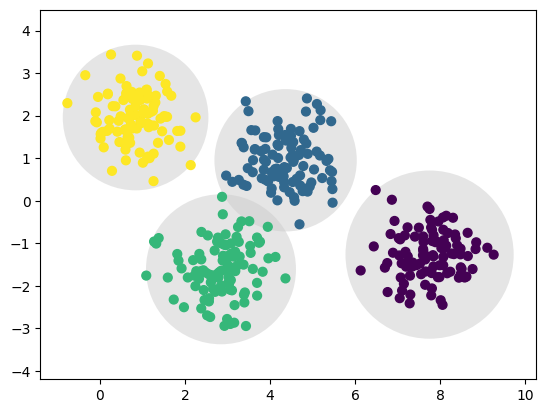

In [51]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_KMeans(kmeans, X)

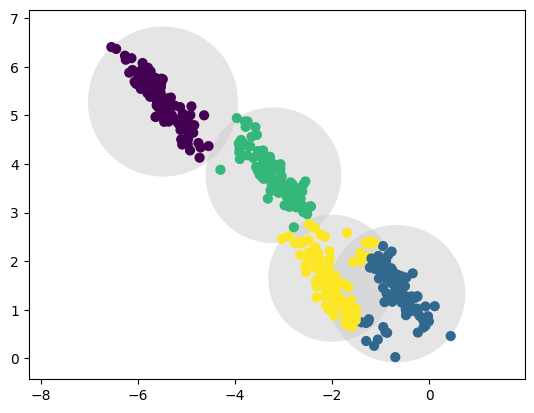

In [52]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_KMeans(kmeans, X_stretched)

Observation:-

        KMeans always be in circular shape it does not take any other form such as elliptical !!

## GMM:- E-M gaussian

In [60]:
from sklearn import mixture
model = mixture.GaussianMixture(n_components=4,covariance_type='full',random_state=42)

In [61]:
model.fit(X)

GaussianMixture(n_components=4, random_state=42)

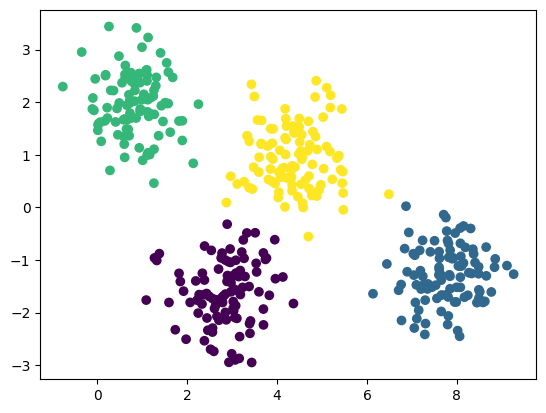

In [64]:
labels = model.predict(X)
plt.scatter(X[:,0],X[:,1],c = labels,cmap = 'viridis')

In [65]:
prob = model.predict_proba(X)
prob

array([[2.44308441e-07, 4.63288197e-01, 1.65215923e-22, 5.36711559e-01],
       [9.99999999e-01, 1.97401298e-17, 4.61002437e-15, 1.23381253e-09],
       [9.99999997e-01, 2.36418727e-14, 2.99373575e-17, 2.72647597e-09],
       ...,
       [1.98562003e-08, 2.13417745e-36, 9.99999929e-01, 5.16035665e-08],
       [4.36840842e-01, 2.75648827e-15, 3.72295841e-04, 5.62786862e-01],
       [5.40633679e-14, 9.78639953e-47, 1.00000000e+00, 1.37230633e-11]])

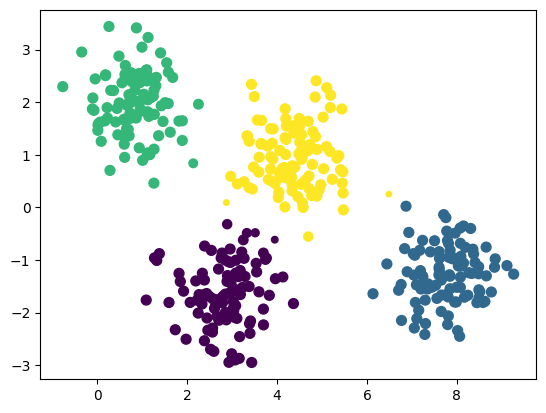

In [67]:
size = 50 * prob.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

In [97]:
from matplotlib.patches import Ellipse

def draw_ellips(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle=angle, **kwargs))


def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellips(pos, covar, ax=ax, alpha=w * w_factor, facecolor='none', edgecolor='black')  

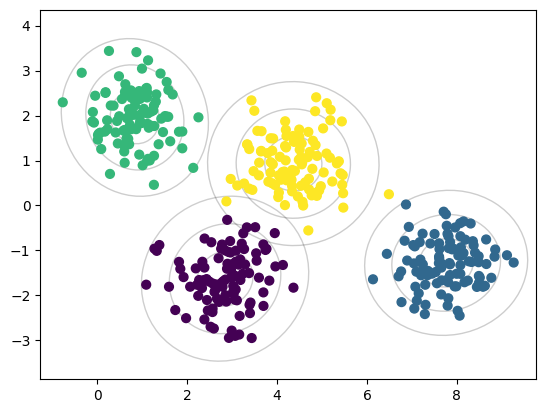

In [98]:
gmm = mixture.GaussianMixture(n_components=4, random_state=42)
plot_gmm(gmm, X)

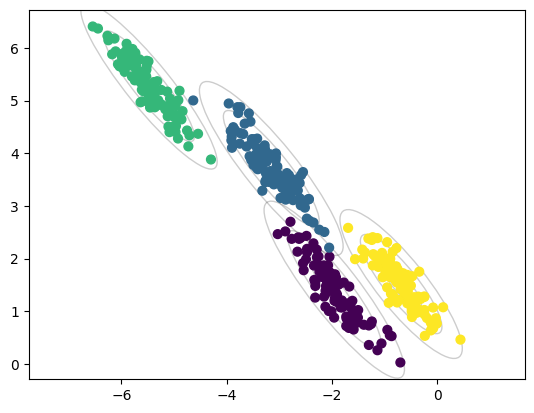

In [100]:
gmm = mixture.GaussianMixture(n_components=4, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)

## GMM as Density Estimation:-

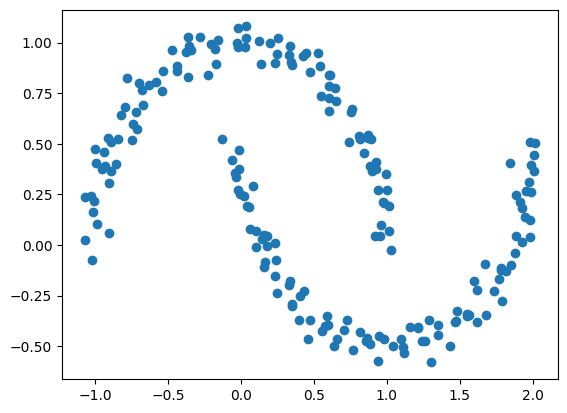

In [104]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);

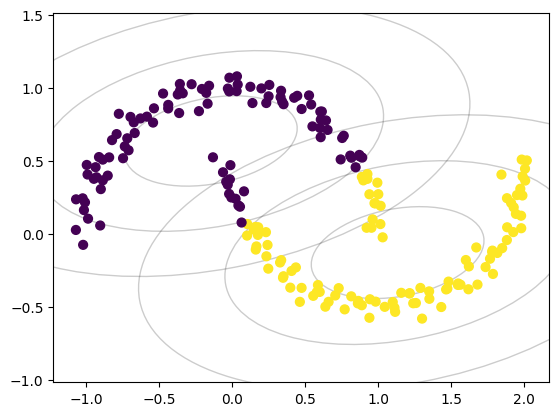

In [106]:
gmm2 = mixture.GaussianMixture(n_components=2, covariance_type='full', random_state=0)
plot_gmm(gmm2, Xmoon)

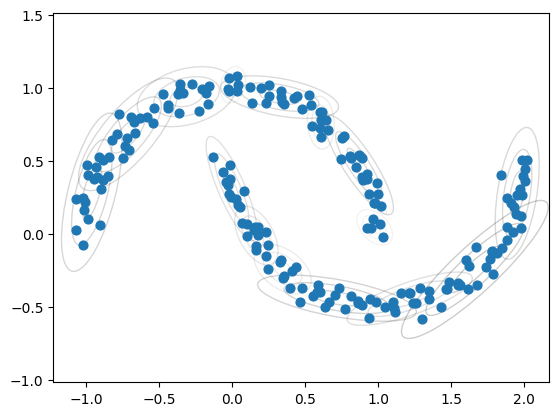

In [107]:
gmm16 = mixture.GaussianMixture(n_components=16, covariance_type='full', random_state=0)
plot_gmm(gmm16, Xmoon, label=False)

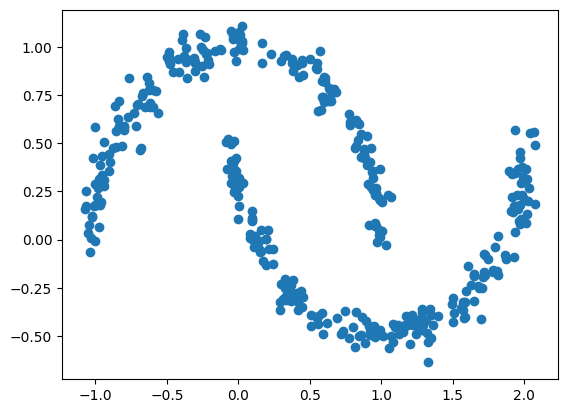

In [112]:
Xnew = gmm16.sample(400)[0]
plt.scatter(Xnew[:, 0], Xnew[:, 1]);

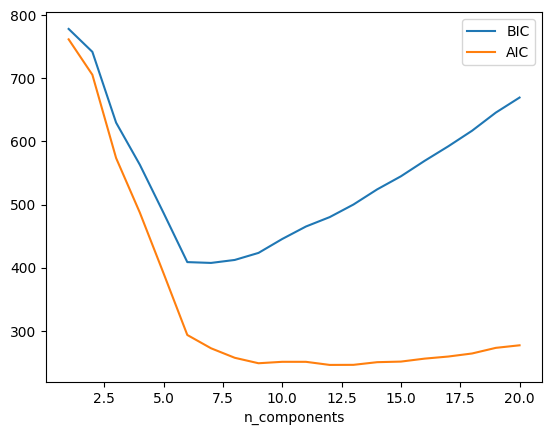

In [114]:
n_components = np.arange(1, 21)
models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0).fit(Xmoon)
          for n in n_components]

plt.plot(n_components, [m.bic(Xmoon) for m in models], label='BIC') #  Bayesian information criterion
plt.plot(n_components, [m.aic(Xmoon) for m in models], label='AIC') #  Akaike information criterion
plt.legend(loc='best')
plt.xlabel('n_components');